<a href="https://colab.research.google.com/github/joserobertofox/datascience/blob/main/MVP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Machine Learning & Analytics - Problema de Classificação**
## **Aluno: José Roberto Assis Silva**

## **1. Definição do Problema**

O dataset que será utilizado neste projeto e o **HCV Data Set** que contém dados para previsão de hepatite C. A fonte deste dataset tem como doador: Instituto de Química Clínica; Universidade de Medicina de Hannover (MHH); Hannover, Alemanha. O conjunto de dados contém valores laboratoriais de doadores de sangue e pacientes com hepatite C e valores demográficos como idade e será tratado como um problema de aprendizado supervisionado. Estes atributos de exames laboratoriais contém varíaveis preditoras ao atributo alvo (variável de classe) para classificar se os doadores têm ou não hepatite C. A variável de classe é **CATEGORY (valores: '0=Doador de Sangue', '0s=Doador de Sangue suspeito', '1=Hepatite', '2=Fibrose', '3=Cirrose')**. Para mais informações sobre este dataset, consulte: https://archive.ics.uci.edu/ml/datasets/HCV+data.

**Atributos do Dataset:**

1. **ID**    - ID do paciente N°
2. **Category** - (valores: '0=Doador de Sangue', '0s=Doador de Sangue suspeito', '1=Hepatite', '2=Fibrose', '3=Cirrose')
3. **Age** - Idade em anos
4. **Sex** - Sexo (m/f)
5. **ALB** - Albumina (3,5 a 5,2 g/dL)
6. **ALP** - Fosfatase Alcalina (40 U/L a 150 U/L)
7. **ALT** - Alamina Aminotransferase (5 a 40 U/L)TGO
8. **AST** - Aspartato Aminotransferase (7 a 56 U/L)TGP
9. **BIL** - Bilirrubina (0,2 a 1,1 mg/dL)
10. **CHE** - Colinesterase Eritrocitaria (h: 4620 - 11500 U/L. ; m: 3930 - 10800 U/L)
11. **CHOL** - Colesterol (menor 200mg/dL)
12. **CREA** - Creatina (h: 0,6 - 1,30 mg/dL ; m: 0,50 - 1,1 mg/dL)
13. **GGT** - Gama Glutamil Transferase (h: até 85 U/L. ; m: até 38 U/L)
14. **PROT** - Proteinas Totais (6 a 8 g/dL)



In [56]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #Normalização
from sklearn.preprocessing import MinMaxScaler #Padronização
import missingno as ms # para tratamento de missings
from sklearn.model_selection import train_test_split # Particionar em bases de treino e teste (holdout)
from sklearn.preprocessing import OrdinalEncoder # Codificação ordinal (ordinal encoding)
from sklearn.model_selection import StratifiedKFold # Cross Validation
from sklearn.linear_model import LogisticRegression # Algorítimo Regressão Logística
from sklearn.tree import DecisionTreeClassifier # Árvore de classificação
from sklearn.neighbors import KNeighborsClassifier #Algorítimo KNN (k-nearest neighbours)
from sklearn.naive_bayes import GaussianNB # Algorítimo Naive Bayes
from sklearn.svm import SVC  # Algorítimo SVN (Support vector machine) - Classificação
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score # Cálcular a acurácia
from sklearn.ensemble import BaggingClassifier # Ensembles do tipo bagging
from sklearn.ensemble import RandomForestClassifier # Ensembles do tipo bagging - Algorítimo Random Forest
from sklearn.ensemble import ExtraTreesClassifier # Ensembles do tipo bagging - Algorítimo Extra Trees
from sklearn.ensemble import VotingClassifier # Ensembles do tipo Voting
from sklearn.ensemble import AdaBoostClassifier # Ensembles do tipo Boosting - Alorítimo AdaBoost
from sklearn.ensemble import GradientBoostingClassifier # Ensembles do tipo Boosting - Algorítimo Gradient Boosting


In [28]:
# Configuração para tratamento de erros
import warnings
warnings.filterwarnings("ignore")

## **2. Carga do Dataset**

Vou utilizar o pacote Pandas (Python Data Analysis Library) para fazer a carga do arquivo **hcvdata0** em formato **.csv** e a partir do carregamento vou fazer uma análise exploratória.



In [29]:
# Carregamento do arquivo hcvdata0.csv usando Pandas e usando a URL do repositório no GITHUB

# Varíavel recebendo a URL do repositório para onde foi feito o upload do arquivo no GITHUB
url = "https://raw.githubusercontent.com/joserobertofox/datascience/main/hcvdat01.csv"

# Informando o cabeçalho das colunas e deixando o ID de fora do meu Dataset
colunas = ['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Carregando o arquivo utilizando as descrições informadas das colunas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [30]:
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## **3. Pré-Processamento dos Dados**


### 3.1. Transformações Categóricas

Vou fazer a codificação ordinal da classe target **Category** para converter em numérica respeitando sua ordenação. Vou fazer o mesmo com o atributo não ordinal **Sex** do dataset (Variável qualitativa nominal) para fazer a codificação ordinal.

#### 3.1.1 Codificação Ordinal

In [31]:
#Guardando dataset original
datasetPreProc = dataset

# Imprimindo parte do dataset antes da codificação ordinal
print("Antes da codificação ordinal da classe Category e do atributo Sex:")
print(dataset.values[531:544,0:]) # Imprimindo o intervalo da linha 531 a 544 (onde retrata 3 instâncias da classe) com os valores da classe Category

# Ordinal encoding para a classe Category
datasetPreProc['Category']=OrdinalEncoder().fit_transform(datasetPreProc.values[:,0:1])

# Ordinal encoding para a classe Category
datasetPreProc['Sex']=OrdinalEncoder().fit_transform(datasetPreProc.values[:,2:3])

Antes da codificação ordinal da classe Category e do atributo Sex:
[['0=Blood Donor' 68 'f' 41.4 102.3 38.4 26.4 6.8 8.5 6.79 59.0 23.8 68.9]
 ['0=Blood Donor' 70 'f' 40.0 97.9 15.1 15.9 6.8 11.46 5.08 62.0 19.2
  65.3]
 ['0s=suspect Blood Donor' 47 'm' 22.5 124.0 79.5 46.7 2.3 6.83 4.3 170.0
  345.6 58.6]
 ['0s=suspect Blood Donor' 48 'm' 24.9 116.9 49.2 24.3 4.9 3.44 5.25 29.0
  83.0 47.8]
 ['0s=suspect Blood Donor' 49 'm' 21.6 42.2 9.5 10.6 2.4 3.75 3.01 64.0
  38.9 44.8]
 ['0s=suspect Blood Donor' 55 'm' 47.3 106.0 208.8 130.6 0.8 14.8 8.08
  76.0 71.6 78.3]
 ['0s=suspect Blood Donor' 71 'm' 14.9 69.8 19.7 95.2 9.8 13.3 2.61 9.0
  7.6 47.0]
 ['0s=suspect Blood Donor' 74 'm' 20.3 84.0 22.8 43.0 5.7 4.91 3.19 52.0
  218.3 47.8]
 ['0s=suspect Blood Donor' 59 'f' 19.3 208.2 325.3 146.6 6.9 5.33 4.72
  32.0 295.6 53.1]
 ['1=Hepatitis' 38 'm' 45.0 56.3 nan 33.1 7.0 9.58 6.0 77.9 18.9 63.0]
 ['1=Hepatitis' 19 'm' 41.0 nan 87.0 67.0 12.0 7.55 3.9 62.0 65.0 75.0]
 ['1=Hepatitis' 23 'm' 47.0

In [32]:
# Imprimindo os dados transformados pela codificação ordinal
print("Classe e atributo transformados:")
print(datasetPreProc.values[531:544,0:]) # Imprimindo o intervalo da linha 531 a 544 (onde retrata 3 instâncias da classe) com os valores da classe Category

Classe e atributo transformados:
[[  0.    68.     0.    41.4  102.3   38.4   26.4    6.8    8.5    6.79
   59.    23.8   68.9 ]
 [  0.    70.     0.    40.    97.9   15.1   15.9    6.8   11.46   5.08
   62.    19.2   65.3 ]
 [  1.    47.     1.    22.5  124.    79.5   46.7    2.3    6.83   4.3
  170.   345.6   58.6 ]
 [  1.    48.     1.    24.9  116.9   49.2   24.3    4.9    3.44   5.25
   29.    83.    47.8 ]
 [  1.    49.     1.    21.6   42.2    9.5   10.6    2.4    3.75   3.01
   64.    38.9   44.8 ]
 [  1.    55.     1.    47.3  106.   208.8  130.6    0.8   14.8    8.08
   76.    71.6   78.3 ]
 [  1.    71.     1.    14.9   69.8   19.7   95.2    9.8   13.3    2.61
    9.     7.6   47.  ]
 [  1.    74.     1.    20.3   84.    22.8   43.     5.7    4.91   3.19
   52.   218.3   47.8 ]
 [  1.    59.     0.    19.3  208.2  325.3  146.6    6.9    5.33   4.72
   32.   295.6   53.1 ]
 [  2.    38.     1.    45.    56.3     nan  33.1    7.     9.58   6.
   77.9   18.9   63.  ]
 [  2.    

In [33]:
print(dataset.groupby('Category').size())

Category
0.0    533
1.0      7
2.0     24
3.0     21
4.0     30
dtype: int64


In [34]:
print(dataset.groupby('Sex').size())

Sex
0.0    238
1.0    377
dtype: int64


### 3.2. Tratamento de Missings e Limpeza
Analisando o dataset verifiquei que existem poucos valores missings (faltantes) e vou preparar estes dados. Verifiquei também que não existem valores "0" nos atributos. Através do comando abaixo verifiquei que o dataset possui missings nos atributos ALP(18), ALT(1), CHOL(10) e PROT(1). Analisando a visualização da nulidade concluimos que a proporção de nulos nos atributos não é alta. Vamos tratar os mesmos substituindo pela mediana.

In [35]:
# verificando nulls (missings) no dataset
datasetPreProc.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

<Axes: >

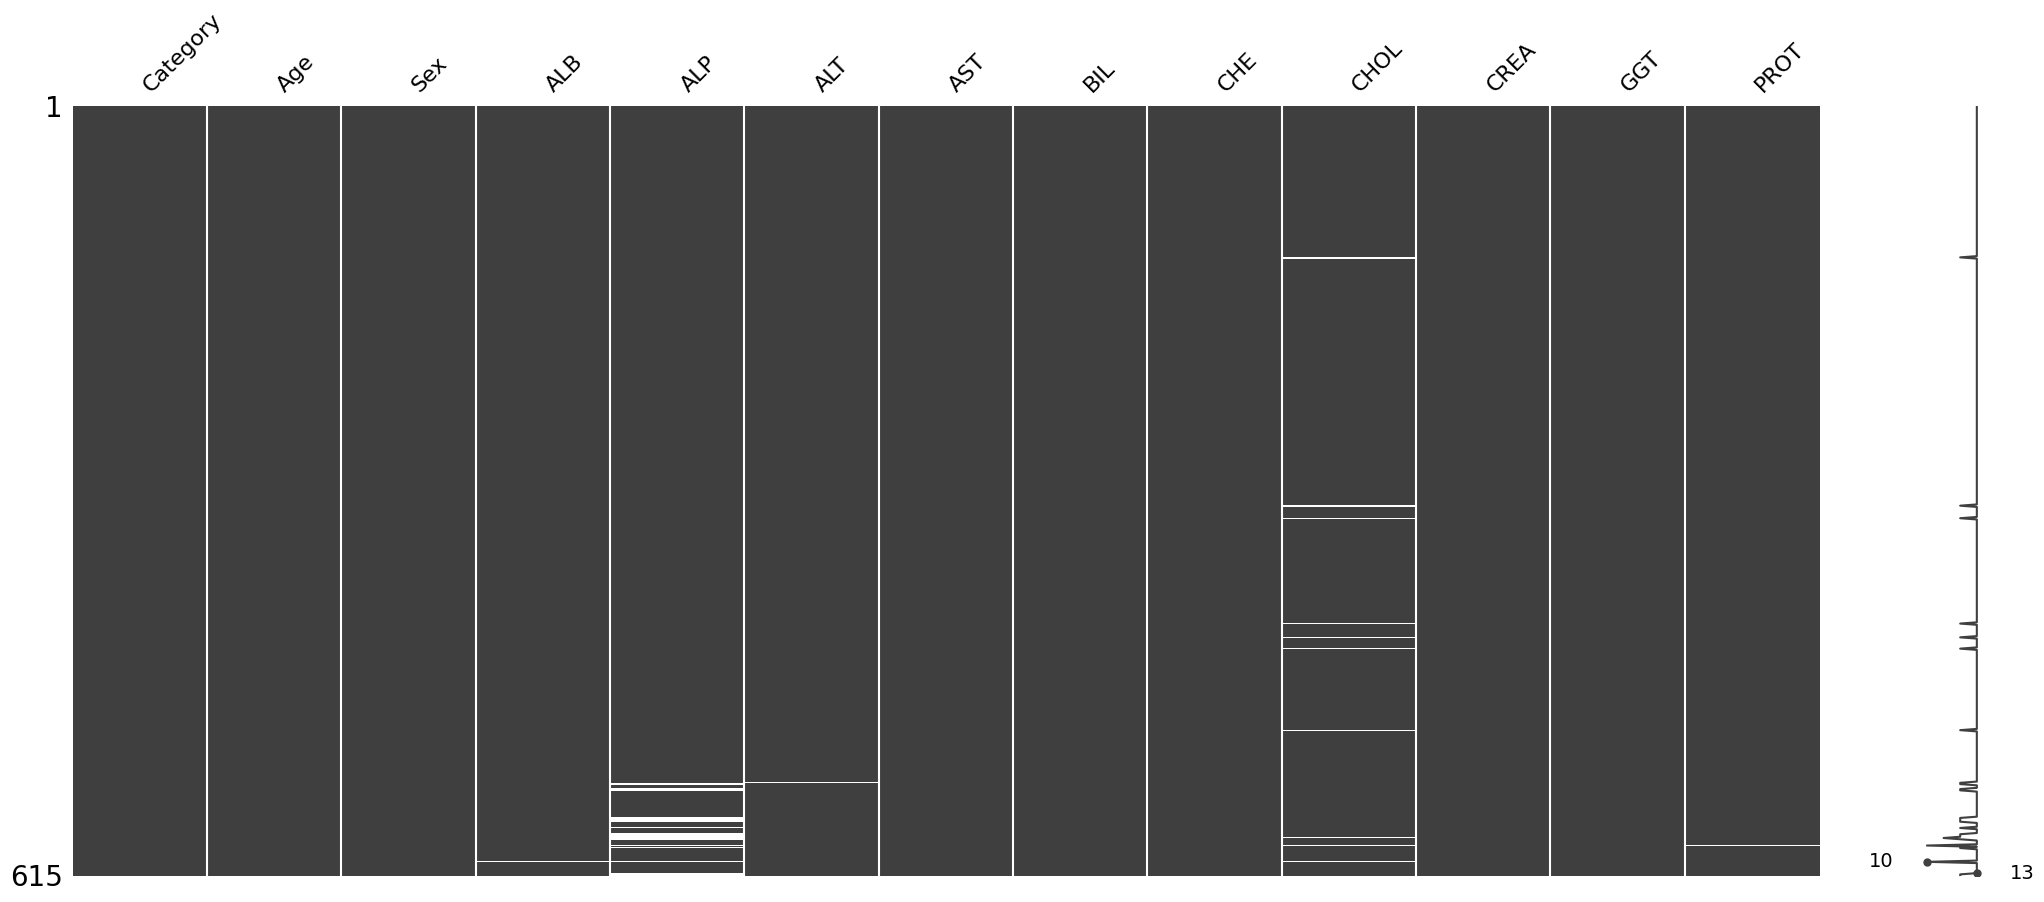

In [36]:
# Exibindo visualização matricial da nulidade da copia do dataset
ms.matrix(datasetPreProc)

<Axes: >

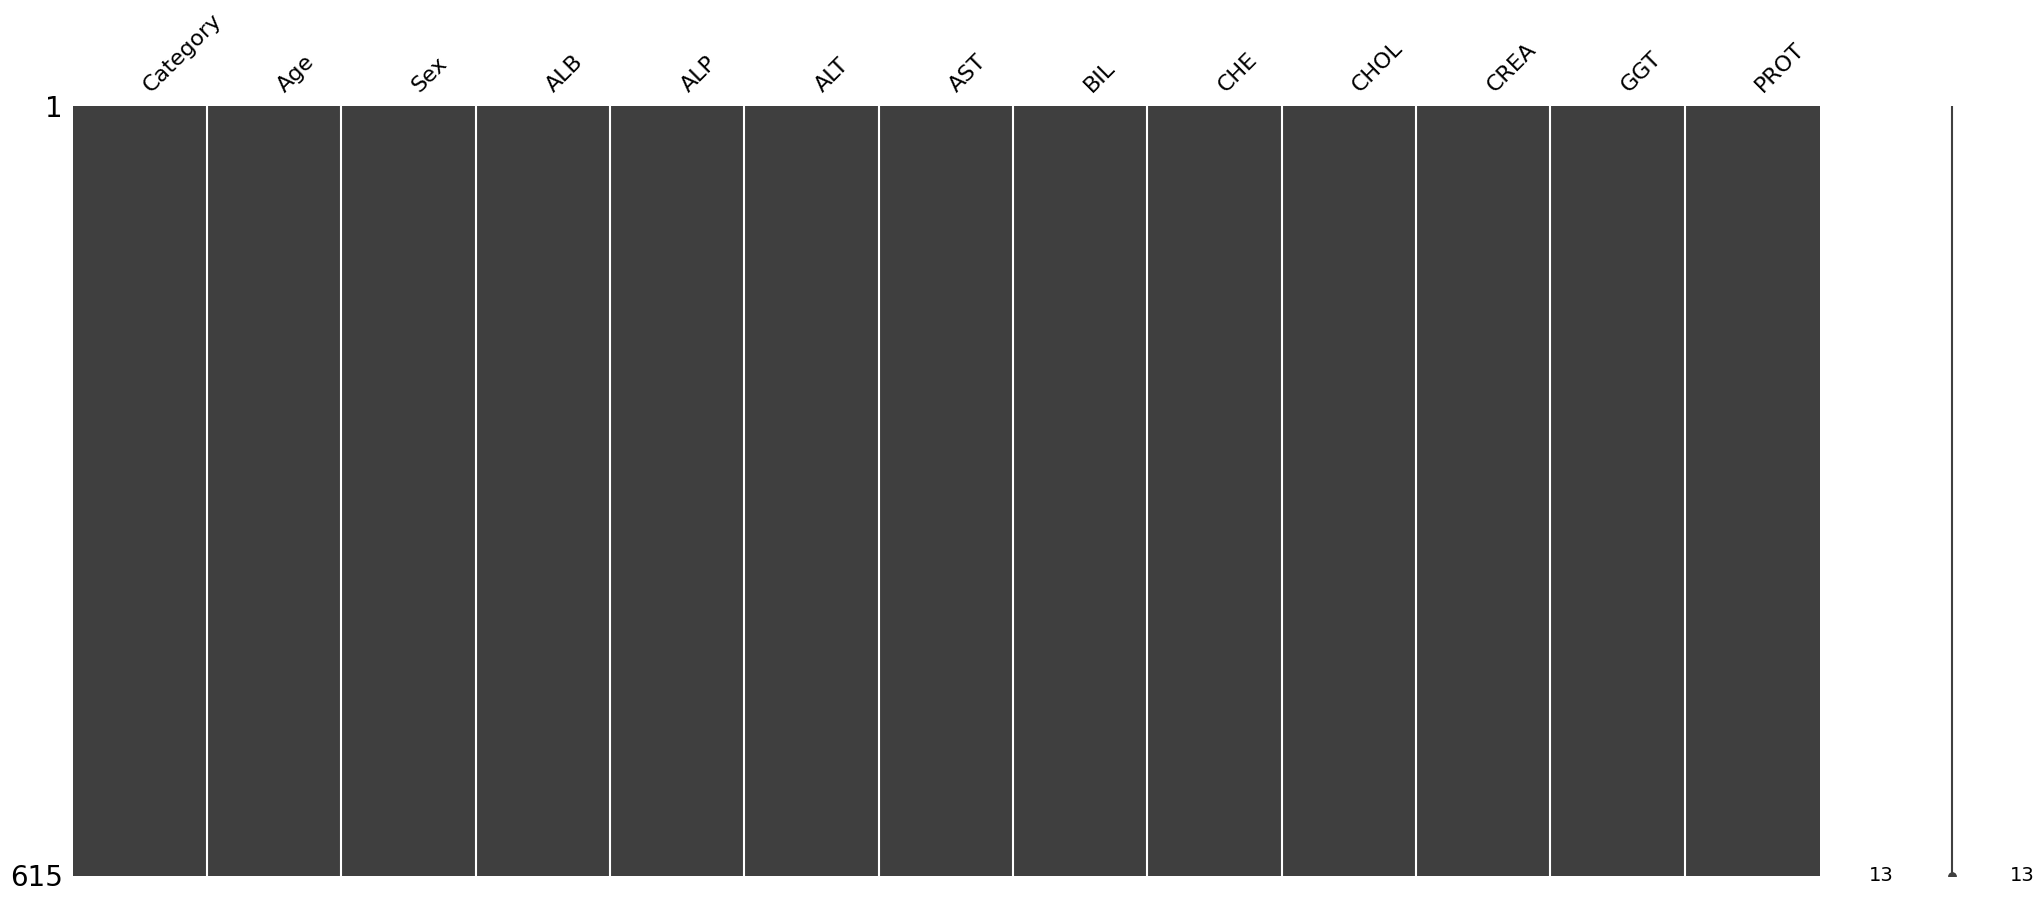

In [37]:

# Substituindo os NaN de 'ALB', 'ALP', 'ALT', 'CHOL' e 'PROT' pela mediana da coluna
datasetPreProc['ALB'].fillna(datasetPreProc['ALB'].median(), inplace=True)
datasetPreProc['ALP'].fillna(datasetPreProc['ALP'].median(), inplace=True)
datasetPreProc['ALT'].fillna(datasetPreProc['ALT'].median(), inplace=True)
datasetPreProc['CHOL'].fillna(datasetPreProc['CHOL'].median(), inplace=True)
datasetPreProc['PROT'].fillna(datasetPreProc['PROT'].median(), inplace=True)

# Exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetPreProc)

In [38]:
# Verificando nulls no dataset tratado
datasetPreProc.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

### 3.3. Separação em Conjunto de Treino e Conjunto de Teste com Holdout
Vou utilizar uma técnica de amostragem usando um conjunto teste ou conjunto de validação que é uma amostra de dados que não será utilizada na construção do modelo final. Será utilizada somente no final para validar se a construção do modelo foi bem construída e também para termos uma análise do modelo com dados ainda não utilizados. Criarei um conjunto de dados com 80% do dataset para criarmos o modelo e guardarei 20% para teste de validação, usando a estratégia train-test-split. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 1 a 12) e qual é a coluna da classe alvo (Y - 0). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente. Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [49]:
test_size = 0.20 # Tamanho do conjunto de teste
seed = 12 # semente aleatória

# Separação em conjuntos de treino e teste (dataset Pré-Processado)
array = datasetPreProc.values
X = array[:,1:13]
y = array[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

### 3.3. Validação Cruzada - Cross Validation
Definiremos abaixo os parâmetros e número de partições da validação cruzada. Utilizando este métodos poderemos lidar com o DILEMA BIAS X VARIÂNCIA para manter o equilíbrio entre underfitting e overfitting, estimando o desempenho de generalização do modelo não apenas uma vez (como no holdout), mas diversas vezes (k) deninido no parâmento num-particoes.

In [43]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## 4. Modelagem e Inferência

### 4.1. Criação e Avaliação de Modelos sem os Algorítimos de Ensembles

KNN: 0.902449 (0.017623)
CART: 0.898327 (0.024160)
NB: 0.912857 (0.047968)
SVM: 0.898408 (0.012547)


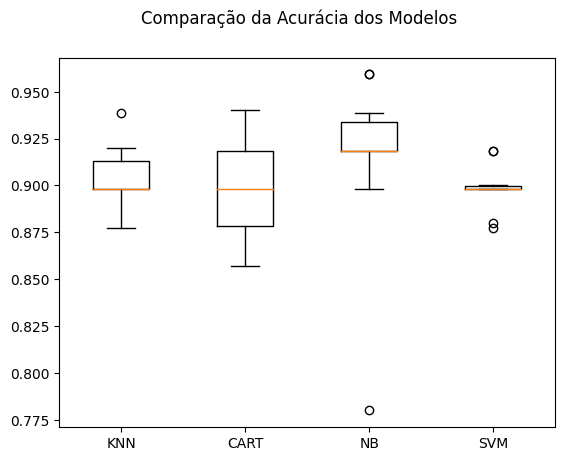

In [50]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos com seus respectivos algorítmos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Verificamos o melhor resultado de acurácia média foi estabelecida pelo algorítimo Naive Bayes (91,29% de acurácia média e 4,8% de desvio padrão) o qual seria escolhido para seguirmos com o modelo. Vou construir, abaixo, um novo modelo treinado com toda a base de treino e depois será avaliado com a base teste.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8780487804878049


Foi obtida uma acurácia de 87,80% com o algorítimo Naive Bayes fazendo predições no conjunto teste.



### 4.2. Criação e Avaliação de Modelos Incluindo Algorítimos Ensembles

Vou agora criar e avaliar modelos incluindo os recursos avançados que são os algorítimos Ensembles utilizados em Machine Learning.

LR: 0.918694 (0.028639)
KNN: 0.902449 (0.017623)
CART: 0.898327 (0.024160)
NB: 0.912857 (0.047968)
SVM: 0.898408 (0.012547)
Bagging: 0.920776 (0.022834)
RF: 0.920857 (0.033978)
ET: 0.918776 (0.023535)
Ada: 0.910612 (0.024026)
GB: 0.932939 (0.029964)
Voting: 0.916653 (0.014232)


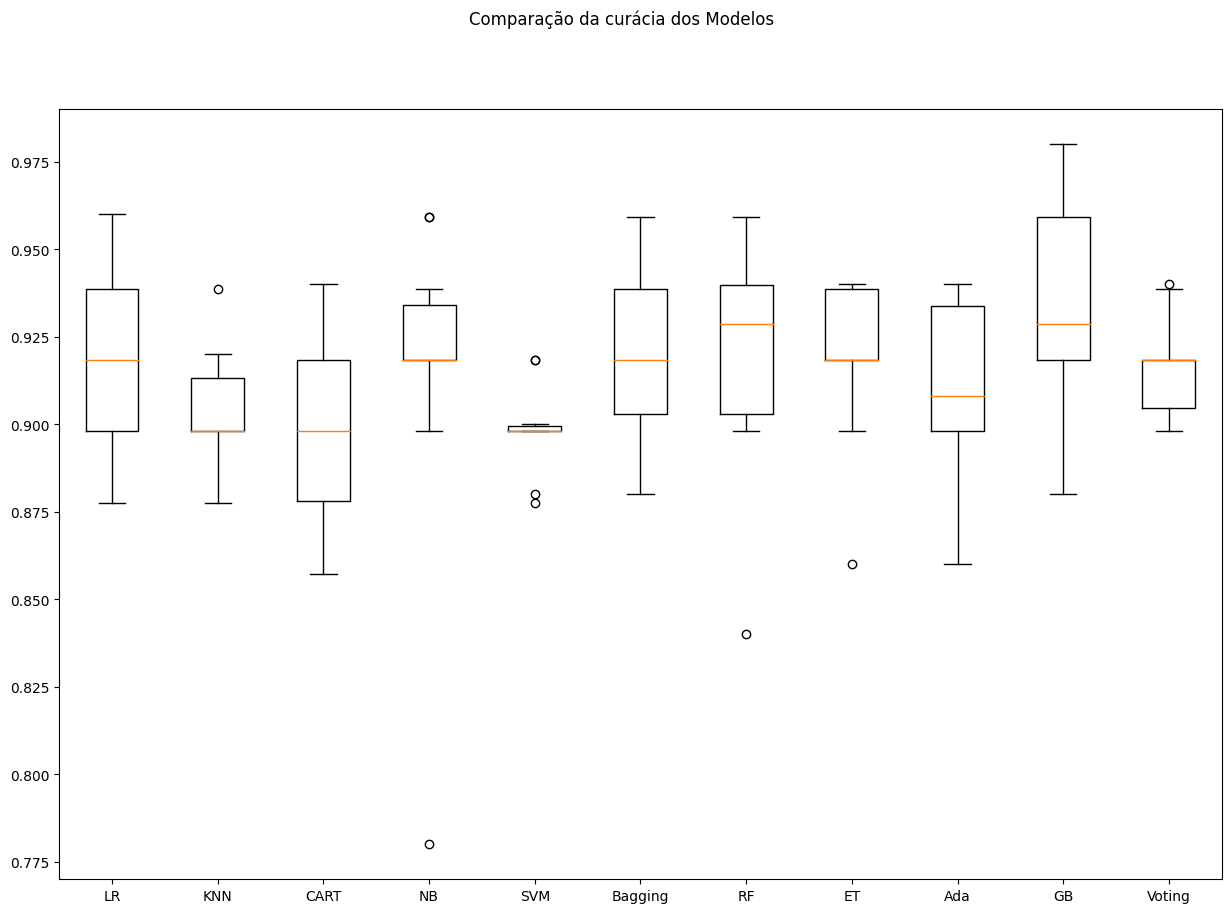

In [54]:
np.random.seed(7) # definindo uma semente global

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos com seus respectivos algorítmos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier (Cria vários modelos de um mesmo algorítimo, neste caso será utilizado a Árvore de Classificação)
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier - O Voting combina predições de modelos, neste caso utilizaremos 3 : Regressão Logística,  Árvore de Classificação e SVC
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo de cada vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação da curácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Notamos que após a inclusão na avaliação dos algorítimos Ensembles o algorítimo Gradient Boosting obteve a melhor acurácia de 93,29%. Este algorítimo cria uma sequência de modelos na qual um modelo tenta corrigir os erros do modelo anterior. Seria este modelo que iríamos seguir com ele.

### 4.3. Criação e Avaliação de Modelos - Dados padronizados e normalizados

Vou utilizar a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados
(evitando o data leakage). Depois compararemos os resultados obtidos dos modelos treinados com normalização e pardronização com os modelos treinados com o dataset original.

LR-orig: 0.919 (0.029)
KNN-orig: 0.902 (0.018)
CART-orig: 0.898 (0.024)
NB-orig: 0.913 (0.048)
SVM-orig: 0.898 (0.013)
Bag-orig: 0.921 (0.023)
RF-orig: 0.921 (0.034)
ET-orig: 0.919 (0.024)
Ada-orig: 0.911 (0.024)
GB-orig: 0.933 (0.030)
Vot-orig: 0.917 (0.014)
LR-padr: 0.927 (0.022)
KNN-padr: 0.894 (0.017)
CART-padr: 0.904 (0.029)
NB-padr: 0.911 (0.048)
SVM-padr: 0.915 (0.025)
Bag-padr: 0.925 (0.030)
RF-padr: 0.927 (0.035)
ET-padr: 0.927 (0.022)
Ada-padr: 0.911 (0.024)
GB-padr: 0.933 (0.030)
Vot-padr: 0.921 (0.019)
LR-norm: 0.898 (0.013)
KNN-norm: 0.888 (0.016)
CART-norm: 0.911 (0.026)
NB-norm: 0.911 (0.048)
SVM-norm: 0.896 (0.014)
Bag-norm: 0.919 (0.028)
RF-norm: 0.927 (0.037)
ET-norm: 0.919 (0.022)
Ada-norm: 0.911 (0.024)
GB-norm: 0.931 (0.032)
Vot-norm: 0.894 (0.015)


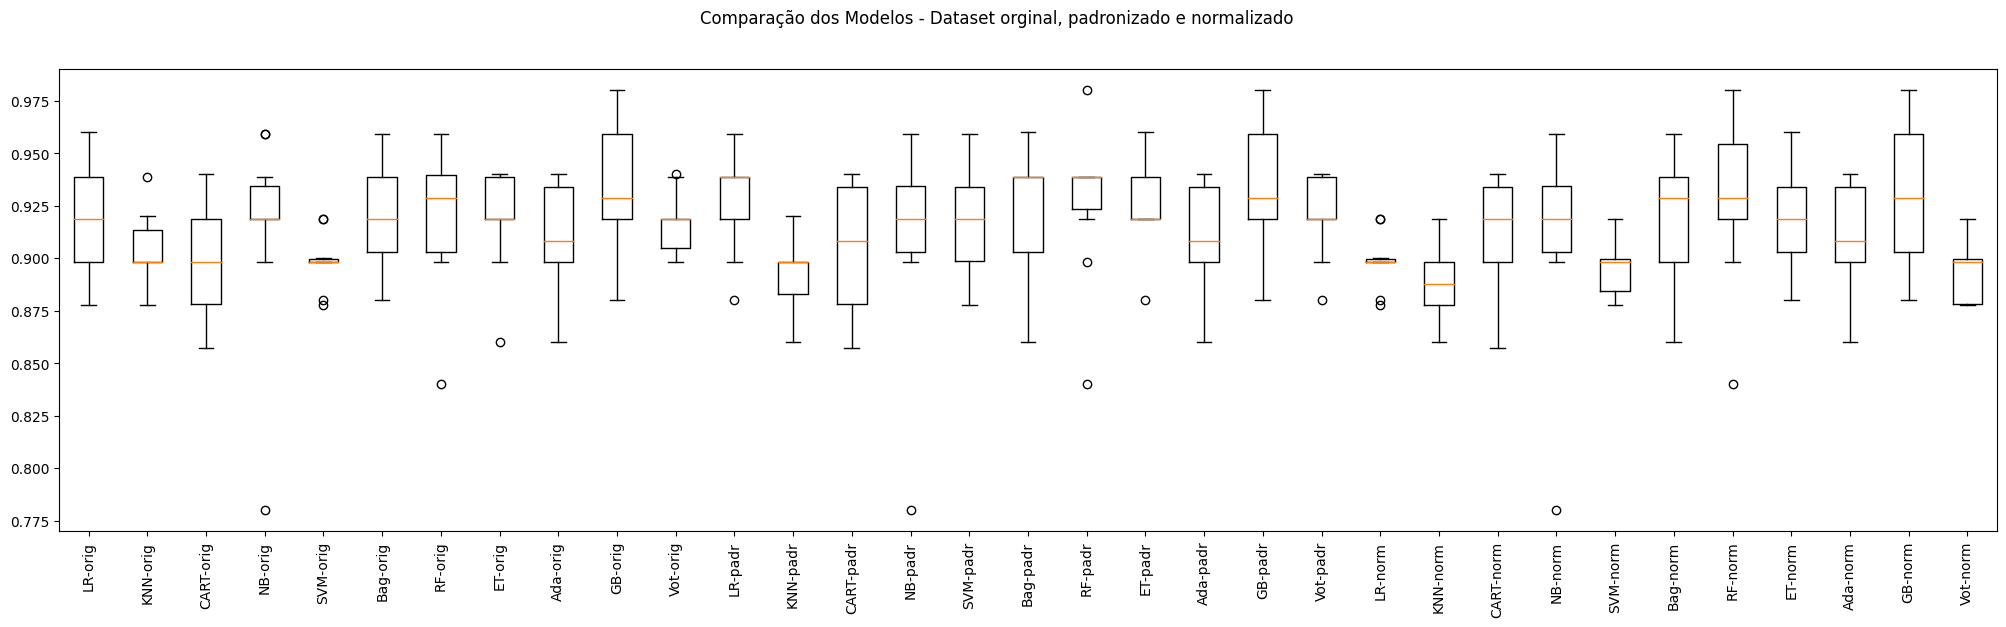

In [57]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo os parâmetros do classificador base para o BaggingClassifier (Cria vários modelos de um mesmo algorítimo, neste caso será utilizado a Árvore de Classificação)
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier - O Voting combina predições de modelos, neste caso utilizaremos 3 : Regressão Logística,  Árvore de Classificação e SVC
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler()) #Padronização
min_max_scaler = ('MinMaxScaler', MinMaxScaler()) #Normalização


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Avaliando os resultados chegamos a conclusão que houve uma igualdade entre o modelos com dados originais que utilizou o algorítimo Gradient Boosting e o modelo com dados padronizados que utilizou o algorítimo Gradient Boosting (0.933), sendo este modelos que obtiveram a melhor acurácia. Houve também uma equivalência entre os dois modelos citados e o modelo com dados normalizados que utiliou o algorítimo Gradient Boosting (0.931). Chegamos a conclusão que este algorítimo se sobressaiu em uma análise dentro mesmo tipo de dados e também na análise do conjunto total de dados (Padrão, Normalizados e Padronizados.



### 4.4. Otimização de Hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))